In [1]:
# 导入需要用到的模块
import pandas as pd
import ephem
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 设置matplotlib的字体和符号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 直接读取文件中的数据，并转换成ephem格式的日期
file = open("time.txt", "r")
datas = file.readlines()
datas = [line.strip() for line in datas]

# 创建一个观察者对象，设置其经纬度
location = ephem.Observer()
location.lon = ephem.degrees('120:9:59')
location.lat = ephem.degrees('35:56:31')

# 创建一个零矩阵，用来存储月球的方位角和高度角
moon_data = np.zeros((len(datas),2))
print(datas)

['2023/4/27 0:41:00', '2023/4/28 0:36:00', '2023/4/29 0:32:00', '2023/4/30 0:44:00', '2023/5/1 0:40:00', '2023/5/2 0:32:00', '2023/5/3 0:25:00', '2023/5/4 0:40:00', '2023/5/5 0:30:00', '2023/5/6 0:36:00', '2023/5/7 0:41:00', '2023/5/8 0:30:00', '2023/5/9 0:36:00', '2023/5/10 1:20:00', '2023/5/11 0:28:00', '2023/5/12 0:28:00', '2023/5/13 0:30:00', '2023/5/14 0:28:00', '2023/5/15 0:35:00', '2023/5/16 0:34:00', '2023/5/17 0:39:00']


In [3]:

# 对每一个日期，计算月球的位置信息，并存入矩阵中
for i, date in enumerate(datas):
    location.date = date

    moon = ephem.Moon(location)
    az = moon.az
    alt = moon.alt

    moon_data[i,:]=(math.degrees(az), math.degrees(alt))

# 把矩阵转换成数据框，并保存到excel文件中
moon_df = pd.DataFrame(moon_data, columns=["Moon Azimuth", "Moon Altitude"])
moon_df.to_excel("moon.xlsx", "Sheet1", index=False)
moon_data

array([[ 41.10740131, -15.9411595 ],
       [ 32.1503288 , -24.49788218],
       [ 22.21251967, -32.34376317],
       [ 15.19147453, -38.67588812],
       [  1.65164529, -45.05729629],
       [343.59695556, -49.33694598],
       [323.43150505, -50.52989316],
       [309.30282162, -51.6954103 ],
       [289.18627527, -46.22571968],
       [275.41787066, -41.0357697 ],
       [263.79362635, -33.84078354],
       [252.36401511, -22.34004613],
       [244.36444292, -13.20753765],
       [242.29421258,  -9.78401291],
       [227.462006  ,   9.71584591],
       [219.18225945,  20.44028536],
       [210.2970576 ,  30.65485547],
       [198.35736784,  40.48229215],
       [186.1375447 ,  48.57250096],
       [166.74726602,  54.60570609],
       [145.74498074,  57.41314948]])

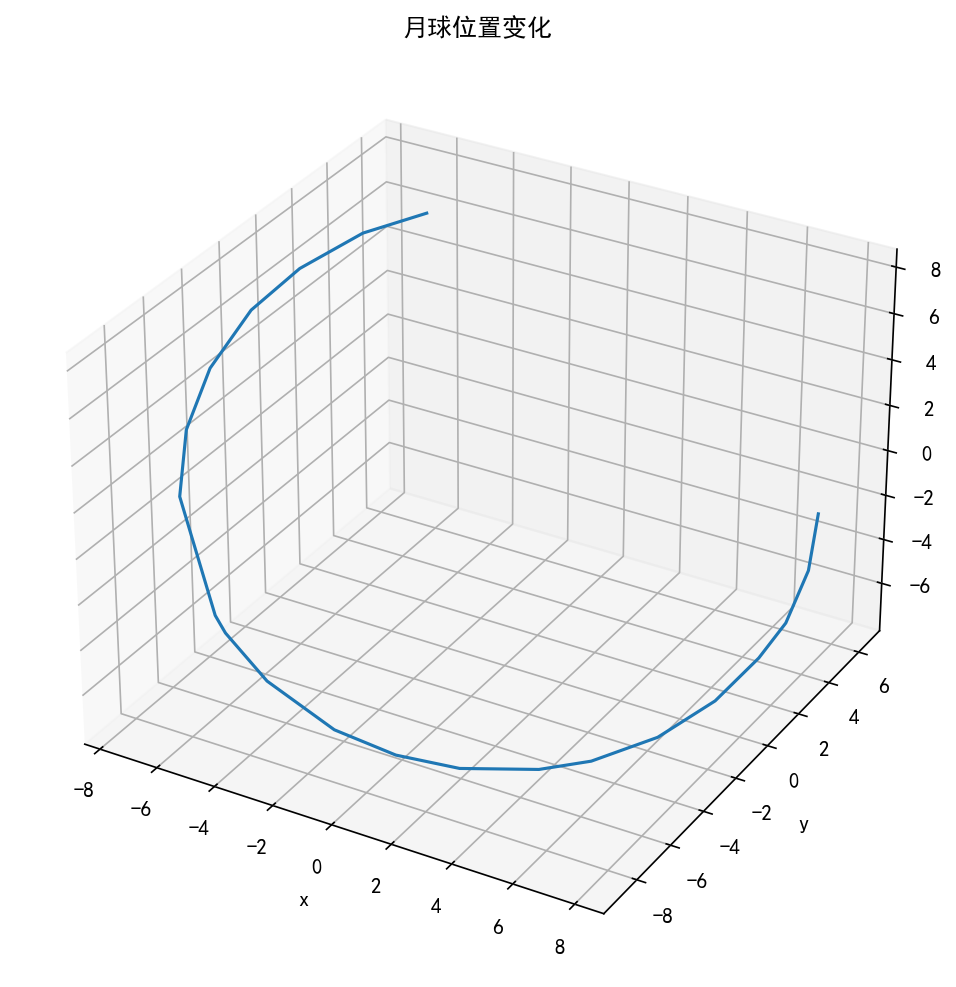

In [4]:
# 把方位角和高度角转换成弧度制，并计算月球在三维空间中的坐标
azimuth=np.radians(moon_data[:,0])
altitude=np.radians(moon_data[:,1])
d=10
r = d * np.cos(altitude)
theta = azimuth
x = r * np.cos(theta)
y = r * np.sin(theta)
z = d * np.sin(altitude)

# 画出月球在三维空间中的轨迹图，并设置标题和坐标轴标签
fig = plt.figure(figsize=(8,8),dpi=150)
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('月球位置变化')

plt.show()

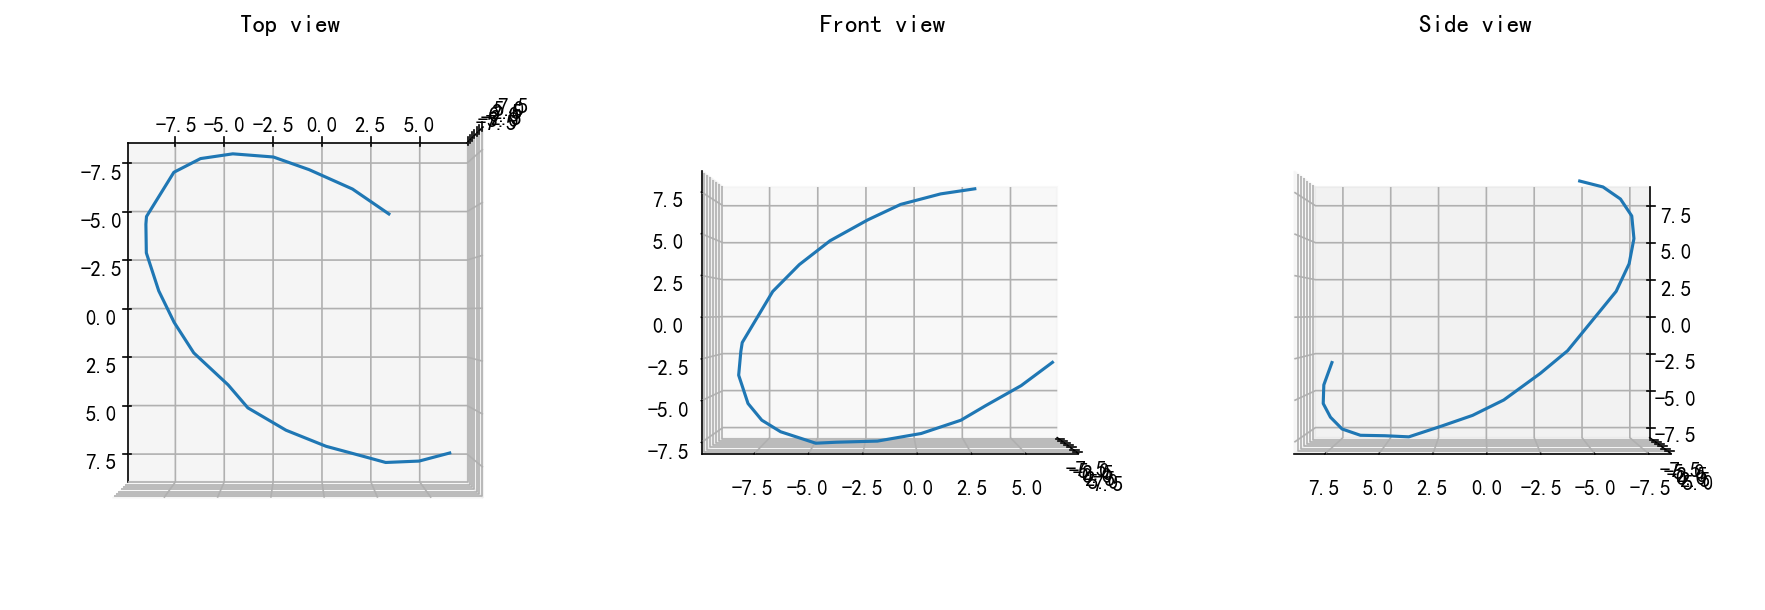

In [5]:
# 画出月球轨迹图的三个视角，并设置标题和坐标轴标签
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=150, subplot_kw={'projection': '3d'})
views = [(90, 0), (0, 0), (0, 90)]
titles = ['Top view', 'Front view', 'Side view']

for ax, view, title in zip(axes.flat, views, titles):
    ax.plot(x, y, z)
    ax.view_init(*view)
    ax.set_title(title)

plt.tight_layout()
plt.show()

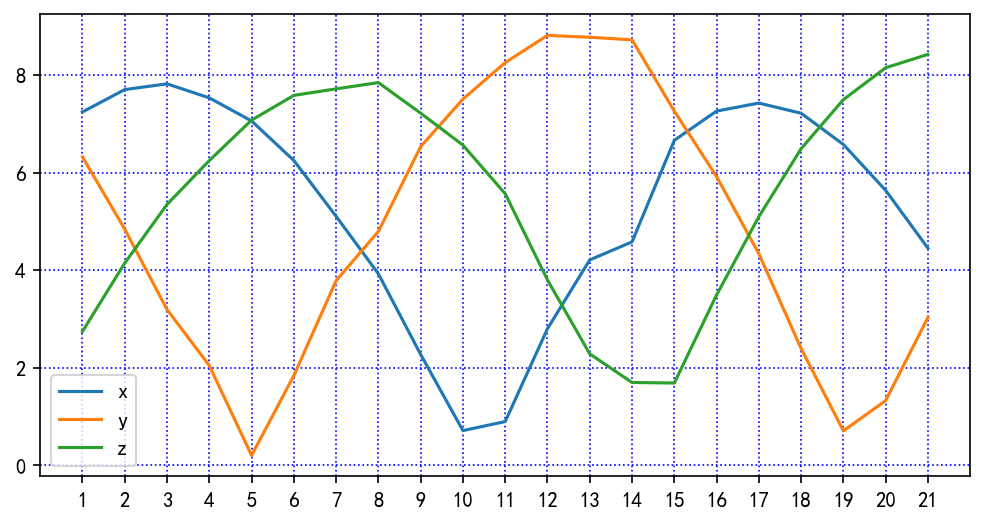

In [6]:
# 画出月球坐标随时间变化的折线图，并设置图例和网格线
plt.figure(figsize=(8, 4),dpi=150)
n = np.arange(1,len(x)+1)

x=np.abs(x)
y=np.abs(y)
z=np.abs(z)

plt.plot(n,x,label='x')
plt.plot(n,y,label='y')
plt.plot(n,z,label='z')
plt.grid(color='b', linestyle='dotted')
plt.xticks(np.arange(1,len(x)+1))
# plt.set_xticklabels(np.arange(1,len(x)+1))
plt.legend()
plt.show()

In [7]:
# 读取海平面数据，并选择需要分析的列，把月球坐标加入数据框中
df = pd.read_excel('sea_level.xlsx')
columns = ['八点潮位', '九点潮位', '测定高度', '月球高度','月球方位角']
data = df[columns]
data=data.assign(X=x,Y=y,Z=z)
data

,八点潮位,九点潮位,测定高度,月球高度,月球方位角,X,Y,Z
0,291,327,300.1,-15.941159,41.107401,7.245029,6.321890,2.746500
1,228,276,269.6,-24.497882,32.150329,7.704361,4.842372,4.146596
2,170,217,180.6,-32.343763,22.212520,7.821552,3.193910,5.349978
3,129,162,127.6,-38.675888,15.191475,7.534125,2.045773,6.249142
4,113,122,121.1,-45.057296,1.651645,7.061058,0.203603,7.078135
5,120,102,135.1,-49.336946,343.596956,6.250882,1.840096,7.585547
6,145,104,179.6,-50.529893,323.431505,5.105398,3.787249,7.719563
7,183,126,177.6,-51.695410,309.302822,3.926196,4.796392,7.847267
8,224,164,222.1,-46.225720,289.186275,2.273597,6.533921,7.220709
9,262,208,272.6,-41.035770,275.417871,0.712201,7.509301,6.565301


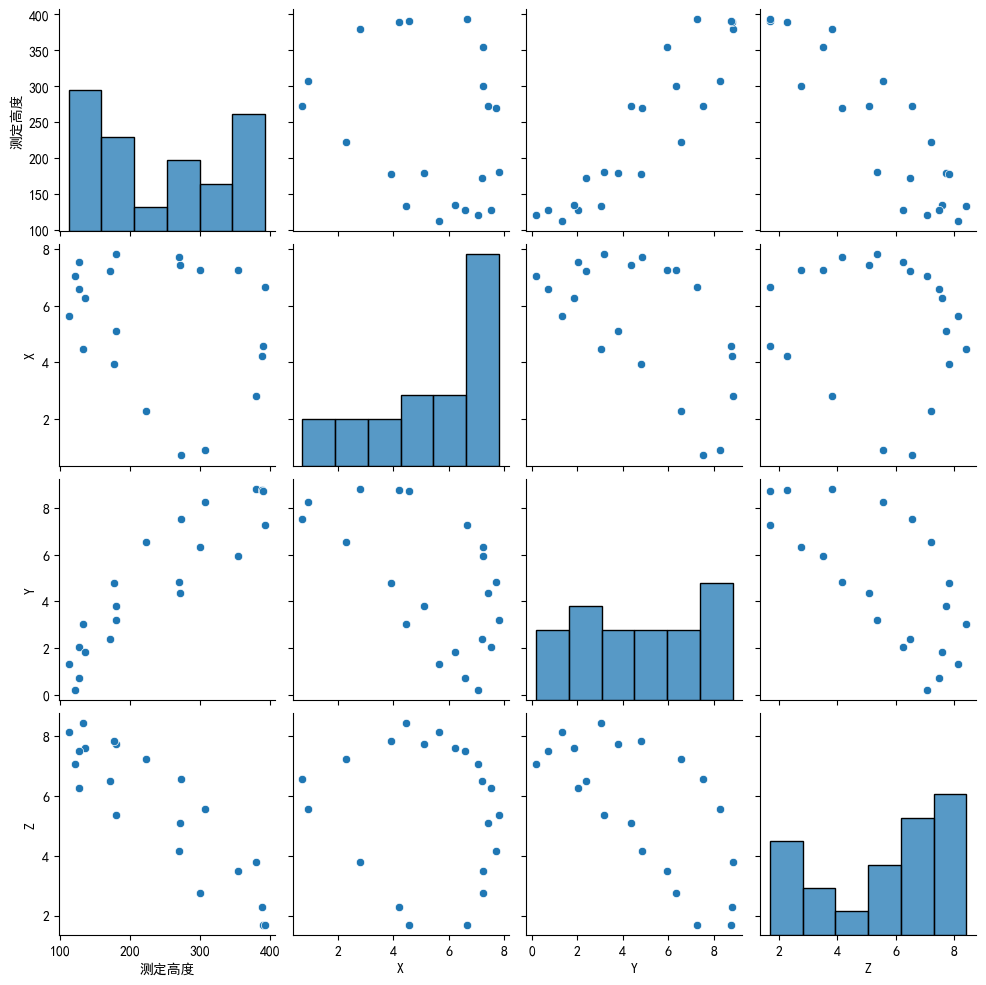

In [11]:
sns.pairplot(data,vars=['测定高度','X','Y','Z'])

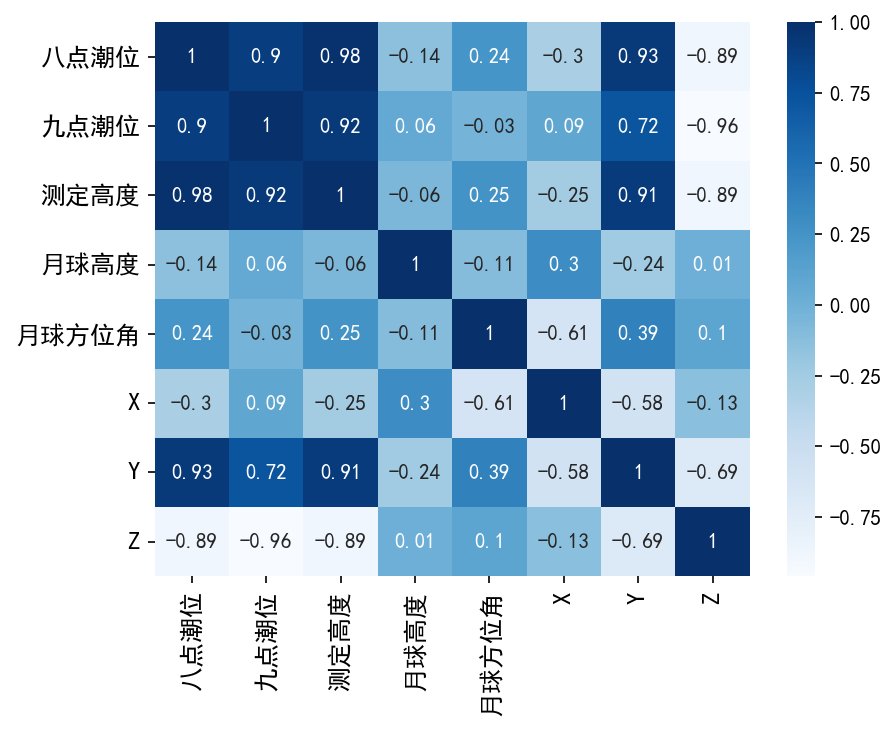

In [9]:
# 计算数据框中各列之间的相关系数，并四舍五入保留两位小数
corr = data.corr()
corr_matrix = np.round(corr, 2)

# 画出相关系数矩阵的热力图，并显示数值和颜色条，设置字体大小
fig = plt.figure(dpi=150)
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.tick_params(axis='both', labelsize=12)
plt.show()